# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Import Data

In [2]:
data = pd.read_csv(r"C:\Users\gajan\OneDrive\Documents\Projects\CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Checking Info of The Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Removing Categorical Variable

In [4]:
df = data.drop(['car_ID','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'], axis = 1)
df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


## Statistical Analysis

In [5]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Checking Missing Values

In [6]:
df.isna().sum()

symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### There is no any missing value in the data.

## Identifying & Treatment of Outliers

<AxesSubplot:>

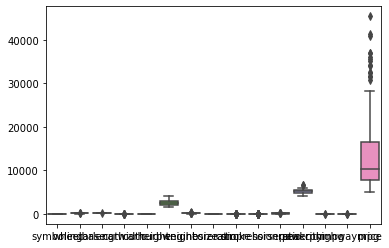

In [7]:
sns.boxplot(data = df)

## Removing Outliers By Winsorizing Technique

In [8]:
def outliers(df):
    a = df.select_dtypes(include = [np.number]).columns.tolist()
    for i in a:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3+1.5*iqr
        lower_limit = q1-1.5*iqr
        df[i] = np.where(df[i]>upper_limit,upper_limit,df[i])
        df[i] = np.where(df[i]<lower_limit,lower_limit,df[i])

In [9]:
outliers(df)

<AxesSubplot:>

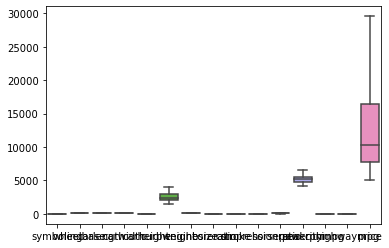

In [10]:
sns.boxplot(data = df)

# Data Partition

In [11]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [12]:
X = df.drop('price', axis = 1)
y = df[['price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=100)

In [13]:
new = pd.concat([y_train, X_train], axis=1)
new

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
122,7609.0,1.0,93.7,167.3,63.8,50.8,2191.0,98.0,2.97,3.23,9.4,68.0,5500.0,31.0,38.0
125,22018.0,3.0,94.5,168.9,68.3,50.2,2778.0,151.0,3.94,3.11,9.5,143.0,5500.0,19.0,27.0
166,9538.0,1.0,94.5,168.7,64.0,52.6,2300.0,98.0,3.24,3.08,9.4,112.0,6550.0,26.0,29.0
1,16500.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
199,18950.0,-1.0,104.3,188.8,67.2,57.5,3157.0,130.0,3.62,3.15,7.5,162.0,5100.0,17.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,9279.0,1.0,96.3,172.4,65.4,51.6,2403.0,110.0,3.17,3.46,7.5,116.0,5500.0,23.0,30.0
103,13499.0,0.0,100.4,184.6,66.5,55.1,3060.0,181.0,3.43,3.27,9.0,152.0,5200.0,19.0,25.0
67,25552.0,-1.0,110.0,190.9,70.3,56.5,3515.0,183.0,3.58,3.64,10.6,123.0,4350.0,22.0,25.0
24,6229.0,1.0,93.7,157.3,63.8,50.6,1967.0,90.0,2.97,3.23,9.4,68.0,5500.0,31.0,38.0


## Checking Correlation

In [14]:
new.corr()

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
price,1.000000,-0.134680,0.652397,0.740722,0.826104,0.124667,0.884383,0.866169,0.552274,0.134426,0.015049,0.820773,-0.146851,-0.700733,-0.725830
symboling,-0.134680,1.000000,-0.539845,-0.390880,-0.265715,-0.557179,-0.268481,-0.186647,-0.132768,-0.024632,-0.153651,0.037024,0.344082,-0.046394,0.010051
wheelbase,0.652397,-0.539845,1.000000,0.878266,0.802832,0.556700,0.792688,0.613947,0.484057,0.235866,0.080285,0.440677,-0.347241,-0.476295,-0.540854
carlength,0.740722,-0.390880,0.878266,1.000000,0.854969,0.454721,0.881495,0.734118,0.620436,0.175386,-0.007279,0.622607,-0.301425,-0.673829,-0.702818
carwidth,0.826104,-0.265715,0.802832,0.854969,1.000000,0.249746,0.879814,0.778347,0.584107,0.240463,0.020555,0.691385,-0.194557,-0.661886,-0.694972
carheight,0.124667,-0.557179,0.556700,0.454721,0.249746,1.000000,0.272388,0.115640,0.160835,0.024916,0.129526,-0.102489,-0.359424,-0.003989,-0.069450
curbweight,0.884383,-0.268481,0.792688,0.881495,0.879814,0.272388,1.000000,0.875330,0.625759,0.195624,-0.029011,0.793062,-0.278447,-0.746709,-0.789811
enginesize,0.866169,-0.186647,0.613947,0.734118,0.778347,0.115640,0.875330,1.000000,0.588781,0.231583,-0.033902,0.832181,-0.281953,-0.650601,-0.668601
boreratio,0.552274,-0.132768,0.484057,0.620436,0.584107,0.160835,0.625759,0.588781,1.000000,-0.167368,0.006557,0.520333,-0.288383,-0.541398,-0.534801
stroke,0.134426,-0.024632,0.235866,0.175386,0.240463,0.024916,0.195624,0.231583,-0.167368,1.000000,-0.017662,0.134170,-0.016660,-0.062882,-0.047147


<AxesSubplot:>

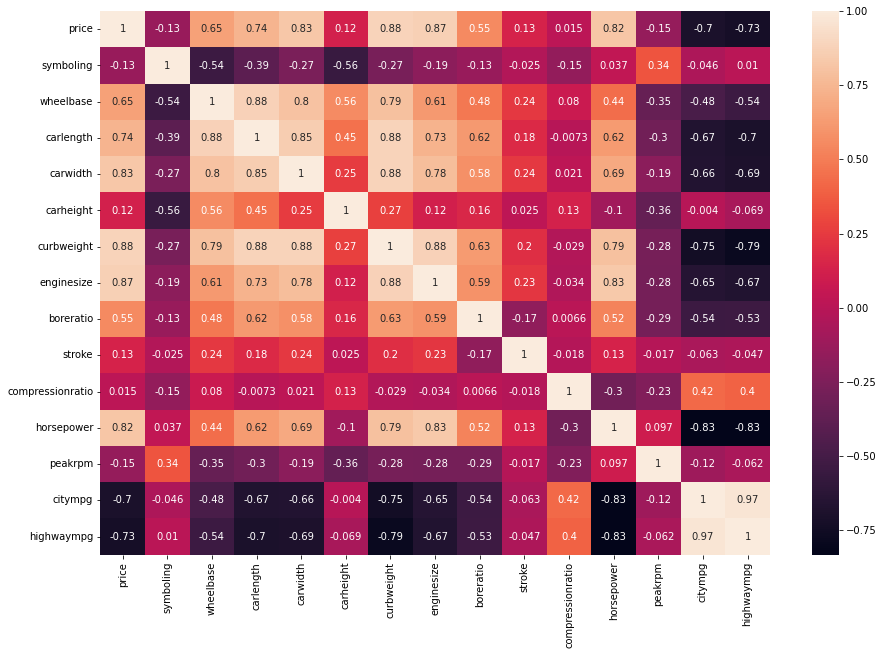

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(new.corr(), annot = True)

<AxesSubplot:title={'center':'price vs curbweight'}, xlabel='curbweight', ylabel='price'>

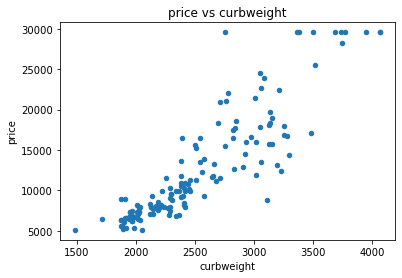

In [16]:
new.plot.scatter(x='curbweight', y='price', title='price vs curbweight')

<AxesSubplot:title={'center':'price vs enginesize'}, xlabel='enginesize', ylabel='price'>

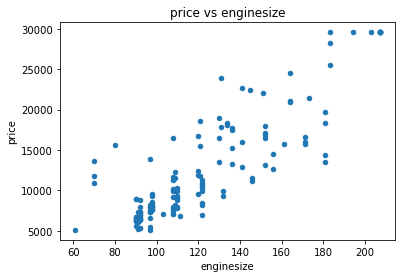

In [17]:
new.plot.scatter(x='enginesize', y='price', title='price vs enginesize')

<AxesSubplot:title={'center':'price vs carwidth'}, xlabel='carwidth', ylabel='price'>

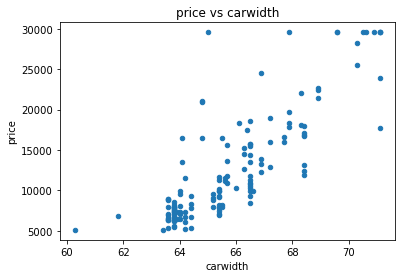

In [18]:
new.plot.scatter(x='carwidth', y='price', title='price vs carwidth')

* curbweight have 88% strong positive correlation with price.
* enginesize have 87% strong positive correlation with price.
* carwidth have 83% strong positive correlation with price.

## Multicolinearity (with the help of VIF)

In [19]:
X1=new.drop(['price','carwidth','wheelbase','carlength','carheight','highwaympg','compressionratio','boreratio','stroke','enginesize','peakrpm','curbweight'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],
                          index=X1.columns) 
series_before

symboling     1.442469
horsepower    3.695736
citympg       3.653608
dtype: float64

### No Collinearity In The Data.

# Model Building
* H0 :- There is no Linear relationship between price and all independent variable.

* Vs

* H1 :- There is Linear relationship between price and all independent variable.

* Alpha = 0.05 (5%)

In [20]:
import statsmodels.formula.api as smf
model = smf.ols('price ~ symboling + horsepower',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           4.90e-53
Time:                        21:16:42   Log-Likelihood:                -1974.7
No. Observations:                 205   AIC:                             3955.
Df Residuals:                     202   BIC:                             3965.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2647.2589    805.961     -3.285      0.001   -4236.434   -1058.084
symboling   -789.5103    209.483     -3.769      0.000   -1202.563    -376.457
horsepower   156.9090      7.332     21.400      0.000     142.452     171.366
==============================================================================
Omnibus:                       15.374   Durbin-Watson:                   0.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.837
Skew:                           0.621   Prob(JB):                     0.000221
Kurtosis:                       3.654   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df['fitted_value']=model.fittedvalues #Predicted Value
df['residual']=model.resid  #Error
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fitted_value,residual
0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,12401.112065,1093.887935
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,12401.112065,4098.887935
2,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,20727.220889,-4227.220889
3,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,11778.441152,2171.558848
4,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,13818.258504,3631.741496


### Linearity

<AxesSubplot:title={'center':'price vs horsepower'}, xlabel='horsepower', ylabel='price'>

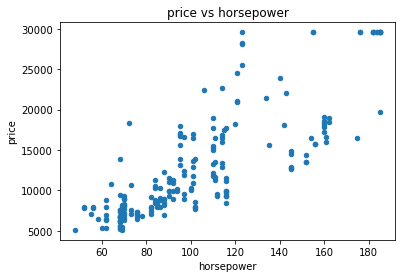

In [24]:
df.plot.scatter(x='horsepower', y='price', title='price vs horsepower')

### Homoscedasticity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

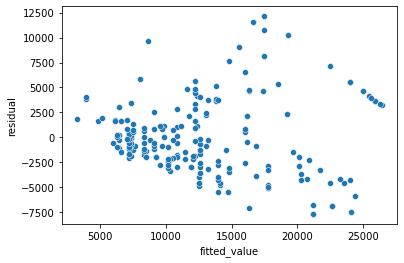

In [25]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

### Normality

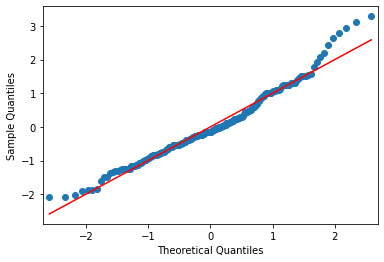

In [26]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

### Model Error are IID

<AxesSubplot:ylabel='Frequency'>

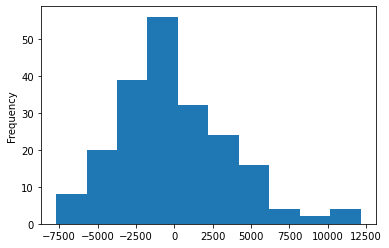

In [27]:
df['residual'].plot.hist()

## Prediction on test data

In [28]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
160,0.0,95.7,166.3,64.4,53.0,2094.0,98.0,3.19,3.03,9.0,70.0,4800.0,38.0,47.0,7738.0
186,2.0,97.3,171.7,65.5,55.7,2275.0,109.0,3.19,3.40,9.0,85.0,5250.0,27.0,34.0,8495.0
59,1.0,98.8,177.8,66.5,53.7,2385.0,122.0,3.39,3.39,8.6,84.0,4800.0,26.0,32.0,8845.0
165,1.0,94.5,168.7,64.0,52.6,2265.0,98.0,3.24,3.08,9.4,112.0,6550.0,26.0,29.0,9298.0
140,2.0,93.3,157.3,63.8,55.7,2240.0,108.0,3.62,2.66,8.7,73.0,4400.0,26.0,31.0,7603.0


In [29]:
df_test['Prediction']=model.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Prediction
160,0.0,95.7,166.3,64.4,53.0,2094.0,98.0,3.19,3.03,9.0,70.0,4800.0,38.0,47.0,7738.0,8336.372949
186,2.0,97.3,171.7,65.5,55.7,2275.0,109.0,3.19,3.40,9.0,85.0,5250.0,27.0,34.0,8495.0,9110.987693
59,1.0,98.8,177.8,66.5,53.7,2385.0,122.0,3.39,3.39,8.6,84.0,4800.0,26.0,32.0,8845.0,9743.588997
165,1.0,94.5,168.7,64.0,52.6,2265.0,98.0,3.24,3.08,9.4,112.0,6550.0,26.0,29.0,9298.0,14137.041754
140,2.0,93.3,157.3,63.8,55.7,2240.0,108.0,3.62,2.66,8.7,73.0,4400.0,26.0,31.0,7603.0,7228.079368


### Test

In [31]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.price, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.69


### Train

In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(df.price, df.fitted_value)
print('R2 score for model Performance on Train', np.round(r2,2))

R2 score for model Performance on Train 0.7


### Here Accuracy of Train Dataset is 70% And Test Dataset Is 69% So We Can Say That Our Model Is Bad Fit.